In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
datafile = '/content/drive/MyDrive/CodingDojo/Project1/ProjectDataSet_sales_predictions.csv'
df = pd.read_csv(datafile)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info() # to check data type and which columns has Nan values, here Item_Weight and Outlet_Size columns have Nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.duplicated().any() # to check for any duplicates

False

In [6]:
#to locate Nan values in Item_Weight 
Nan_Values1 = pd.isnull(df['Item_Weight'])
df[Nan_Values1].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [7]:
Nan_Values1.value_counts() # to count Nan values in Item_Weight column

False    7060
True     1463
Name: Item_Weight, dtype: int64

In [8]:
Nan_Values2 = pd.isnull(df['Outlet_Size']) #to locate Nan values in Outlet_Size column 
df[Nan_Values2].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [9]:
Nan_Values2.value_counts() # to count total Nan values in Outlet_Size column

False    6113
True     2410
Name: Outlet_Size, dtype: int64

# More than thousand values are missing in both the columns
# Since missing values are in very large number, filling missing values is better idea than dropping all of them 

In [10]:
#filling Nan values in all NON-Object columns which is Item_Weight for this Dataframe
# We will use interpolate method to fill missing values for Item_Weight column 
# note that this method only works for int or floats
New_df=df.interpolate(method ='linear', limit_direction ='forward')
New_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,14.925,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


source: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

In [11]:
New_df.isna().sum() # Outlet_Size column still has Nan values

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
#filling Nan values in Outlet_Size 
final_df = New_df.fillna(method ='pad')
final_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [13]:
final_df.isna().sum() # No Nan values in new dataframe

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
final_df.duplicated().any() #to check there is no duplicate rows after filling values

False

In [15]:
final_df['Item_Fat_Content'].value_counts() #to check string inconsistency in Object column

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
#to make all string consistent in the column Item Fat content
final_df.loc[final_df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
final_df.loc[final_df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
final_df.loc[final_df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'

In [17]:
final_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,14.925,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [18]:
### Following commands used to check any string inconsistency in  
###Object columns' values and NO INCONSITETNCY OBSEVED
#final_df['Item_Type'].value_counts() 
#final_df['Outlet_Establishment_Year'].value_counts()
#final_df['Outlet_Size'].value_counts()
#final_df['Outlet_Location_Type'].value_counts()
#final_df['Outlet_Type'].value_counts()

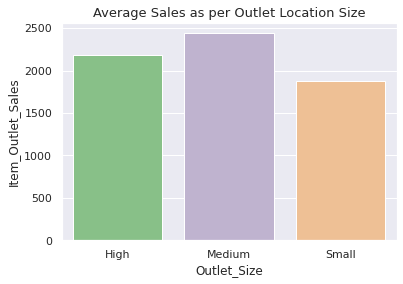

In [65]:
#CALCULATING MEAN VALUE OF SALES AS OUTLET SIZE
sale_size_groupby = final_df.groupby(['Outlet_Size'], as_index= False)['Item_Outlet_Sales'].mean()

sns.set_theme(style='darkgrid', context='notebook');

sns.barplot(x=sale_size_groupby['Outlet_Size'], 
            y=sale_size_groupby['Item_Outlet_Sales'], 
            palette='Accent');

plt.title("Average Sales as per Outlet Location Size", 
              fontsize=13);

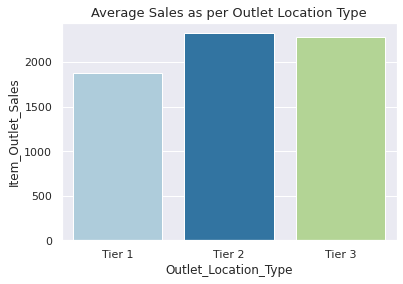

In [80]:
#CALCULATING MEAN VALUE OF SALES AS OUTLET LOCATION
sale_location_groupby = final_df.groupby(['Outlet_Location_Type'], as_index= False)['Item_Outlet_Sales'].mean()

sns.set_theme(style='darkgrid', context='notebook');

sns.barplot(x=sale_location_groupby['Outlet_Location_Type'], 
            y=sale_location_groupby['Item_Outlet_Sales'], 
            palette='Paired');

plt.title("Average Sales as per Outlet Location Type", 
              fontsize=13);

### Outlet Size and Outlet Location Type has NOT very high impact on Total Average Sale

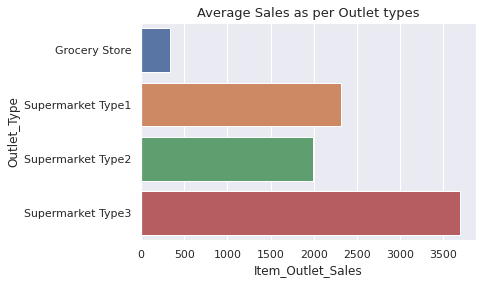

In [21]:
#CALCULATING MEAN VALUE OF SALES AS OUTLET TYPE
Outlet_type_groupby = final_df.groupby(['Outlet_Type'], as_index= False)['Item_Outlet_Sales'].mean()

#plt.figure(figsize=(9,5))
sns.set_theme(style='darkgrid', context='notebook');

sns.barplot(x=Outlet_type_groupby['Item_Outlet_Sales'], 
            y=Outlet_type_groupby['Outlet_Type']);

#plt.xticks(rotation=90);

plt.title("Average Sales as per Outlet types", fontsize=13);

In [47]:
supermarket_3 = final_df[final_df['Outlet_Type'] == 'Supermarket Type3']
supermarket_3_sort = supermarket_3.sort_values(by=['Item_Outlet_Sales'], ascending=False)
supermarket_3_sort['Outlet_Identifier'].value_counts()

OUT027    935
Name: Outlet_Identifier, dtype: int64

The total average sales as per Outlet Type, Supermarket 3 has highest sales 
Only one outlet store OUT027 has whole highest Average sale 

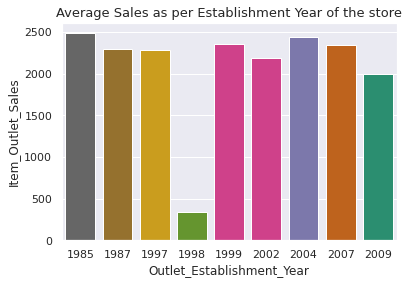

In [22]:
sale_establishment_groupby = final_df.groupby(['Outlet_Establishment_Year'],
                                              as_index= False)['Item_Outlet_Sales'].mean()

sns.set_theme(style='darkgrid', context='notebook');

sns.barplot(x=sale_establishment_groupby['Outlet_Establishment_Year'],
            y=sale_establishment_groupby['Item_Outlet_Sales'],
            palette='Dark2_r');

plt.title("Average Sales as per Establishment Year of the store", 
              fontsize=13);

In [23]:
final_df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [67]:
establishment_year = final_df.loc[final_df['Outlet_Establishment_Year'] == 1998]
establishment_year

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,16.146653,Dairy,45.5086,OUT010,1998,High,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,17.034855,Dairy,55.7956,OUT010,1998,Small,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,8.949893,Dairy,178.1002,OUT010,1998,High,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,Low Fat,19.506823,Snack Foods,185.4266,OUT010,1998,Medium,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NCE07,8.180,Low Fat,2.197698,Household,140.6154,OUT010,1998,Medium,Tier 3,Grocery Store,425.4462
8432,FDI16,14.000,Regular,22.726069,Frozen Foods,54.3640,OUT010,1998,High,Tier 3,Grocery Store,159.7920
8473,DRI47,14.700,Low Fat,3.501609,Hard Drinks,144.3128,OUT010,1998,Medium,Tier 3,Grocery Store,431.4384
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,Medium,Tier 3,Grocery Store,45.2744


In [68]:
e_y_groupby = establishment_year.groupby(['Outlet_Type'], as_index=False).sum('Item_Outlet_Sales')
e_y_groupby[['Outlet_Type', 'Item_Outlet_Sales']]

,Outlet_Type,Item_Outlet_Sales
0,Grocery Store,188340.1724


In 1998, only Grocery stores were established and 1998 year has the least Average Sale

SO far Outlet related data have been observed

Data related to item 

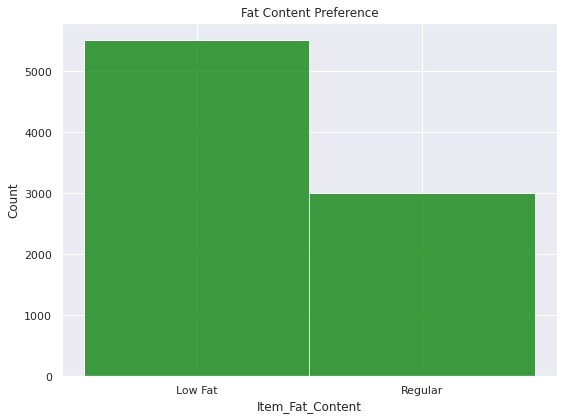

In [26]:

plt.style.use('seaborn-bright')

plt.figure(figsize=(8,6))
sns.histplot(data= final_df, x='Item_Fat_Content',bins=100, 
             kde=False, color="green")
plt.title('Fat Content Preference', 
              fontsize=12);
#plt.xticks(rotation=90)
plt.tight_layout(h_pad=2)
plt.savefig('Belt1.png', dpi = 300);

#files.download("Belt1.png") #to download the png file

Low Fat content is high preference type


In [27]:
ItemType_groupby = final_df.groupby(['Item_Type'], as_index=False)['Item_Outlet_Sales'].sum().sort_values(by='Item_Outlet_Sales', ascending = False)

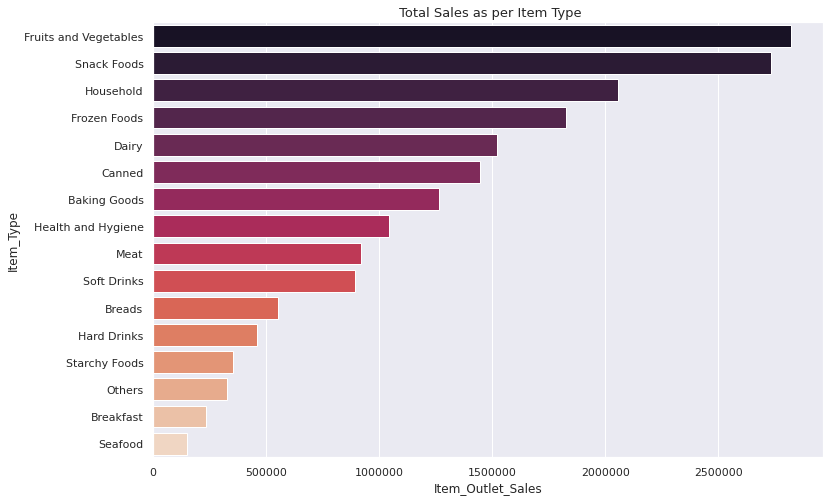

In [28]:
sns.set_theme(style='darkgrid', context='notebook');
#plt.style.use('dark_background')
plt.figure(figsize=(12,8))
sns.barplot(x=ItemType_groupby['Item_Outlet_Sales'], 
            y=ItemType_groupby['Item_Type'], 
            palette='rocket');
plt.ticklabel_format(axis= 'x', style='plain')
plt.title(" Total Sales as per Item Type", 
              fontsize=13);

Sales are more inclined to Fruits and Vegetables and snack foods and less to seafood 

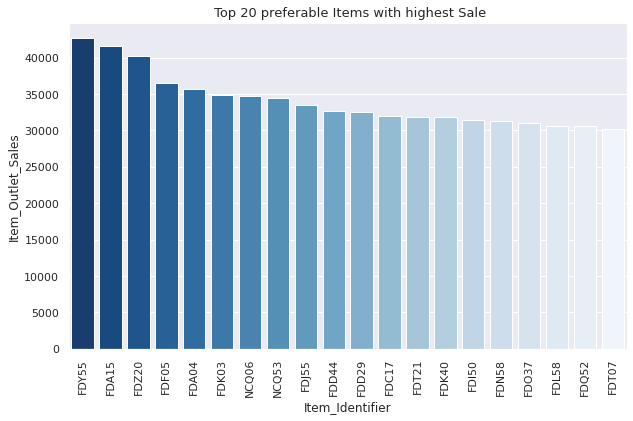

In [29]:
ItemID_groupby = final_df.groupby(['Item_Type','Item_Identifier'], 
                                  as_index=False)['Item_Outlet_Sales'
                                  ].sum().sort_values(by='Item_Outlet_Sales', 
                                               ascending = False).head(20)

plt.figure(figsize=(10,6))

sns.barplot(x=ItemID_groupby['Item_Identifier'], 
            y=ItemID_groupby['Item_Outlet_Sales'], 
            palette='Blues_r');

plt.ticklabel_format(axis= 'y', style='plain')
plt.xticks(rotation=90);
plt.title(" Top 20 preferable Items with highest Sale", 
              fontsize=13);

In [30]:
final_df[(final_df['Item_Identifier'] == 'FDY55') | (final_df['Item_Identifier'] == 'FDA15')] 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
276,FDY55,16.7500,Low Fat,0.081253,Fruits and Vegetables,256.4988,OUT013,1987,High,Tier 3,Supermarket Type1,7452.9652
831,FDA15,9.3000,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,Medium,Tier 2,Supermarket Type1,5976.2208
1255,FDY55,16.7500,Low Fat,0.081651,Fruits and Vegetables,258.3988,OUT018,2009,Medium,Tier 3,Supermarket Type2,1541.9928
1790,FDY55,16.7500,Low Fat,0.081305,Fruits and Vegetables,258.4988,OUT035,2004,Small,Tier 2,Supermarket Type1,4111.9808
2599,FDA15,9.3000,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3000,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4346,FDY55,13.9425,Low Fat,0.000000,Fruits and Vegetables,255.7988,OUT027,1985,Medium,Tier 3,Supermarket Type3,9251.9568
4874,FDA15,9.3000,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,Medium,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3000,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392


### Data for Top 2 highest sale Item which mostly have Low Fat and Super Martket Type 1 and 3 and Item Type as Fruits and Vegetable & Dairy 

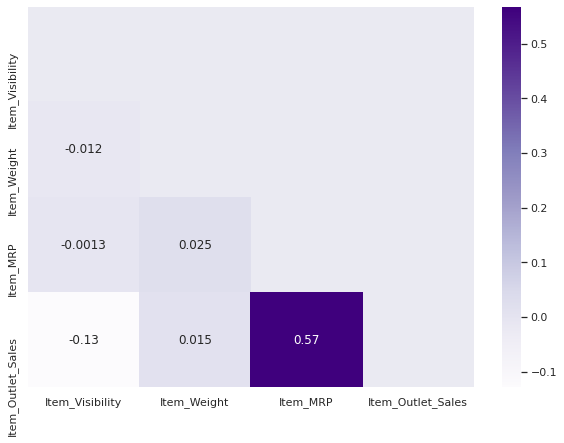

In [31]:
final_df['Item_Visibility'] = final_df['Item_Visibility']*100
ItemVis = final_df[['Item_Visibility', 'Item_Weight', 'Item_MRP', 'Item_Outlet_Sales']]
# with mask
plt.figure(figsize=(10,7))
corr_matrix=ItemVis.corr()

# mask to get rid of top half
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, cmap='Purples', annot=True, mask=mask);


### Item Outlet sales have high positive CO relation with Item MRP where Negative Co relation with Item Visibility. Also very minimal co relation to Item Weight

# From all above analysis, its found that very few feature columns affect in Total Sales 
# So Let's Encode Important Categorial features 

In [183]:
OneHotEncoder_df = pd.get_dummies(final_df, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Type'], drop_first = True)
OneHotEncoder_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,1.604730,249.8092,OUT049,1999,Medium,Tier 1,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.92,1.927822,48.2692,OUT018,2009,Medium,Tier 3,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,FDN15,17.50,1.676007,141.6180,OUT049,1999,Medium,Tier 1,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,Medium,Tier 3,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,High,Tier 3,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [184]:
OneHotEncoder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Identifier                8523 non-null   object 
 5   Outlet_Establishment_Year        8523 non-null   int64  
 6   Outlet_Size                      8523 non-null   object 
 7   Outlet_Location_Type             8523 non-null   object 
 8   Item_Outlet_Sales                8523 non-null   float64
 9   Item_Fat_Content_Regular         8523 non-null   uint8  
 10  Item_Type_Breads                 8523 non-null   uint8  
 11  Item_Type_Breakfast              8523 non-null   uint8  
 12  Item_Type_Canned    

In [185]:
OneHotEncoder_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Item_Outlet_Sales', 'Item_Fat_Content_Regular',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [187]:
X = OneHotEncoder_df[['Item_MRP', 'Item_Visibility', 'Item_Fat_Content_Regular',
      'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods']].values
X.shape

(8523, 21)

In [57]:
y = OneHotEncoder_df['Item_Outlet_Sales'].values
y.shape

(8523,)

# Checking prediction with Linear Regression

In [188]:
#instantiate the model
Lregression = LinearRegression(fit_intercept= True)

In [189]:
#fit the model
Lregression.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#run for error 
#Lregression.predict(X[0])

In [194]:
#rectify
Lregression.predict(X[0].reshape(-1, 21))

array([3971.01422202])

In [198]:
#predict y providing X
Lregression.predict(X[0:10])

array([3971.01422202,  559.03428701, 2328.99283628, 1082.85916065,
        926.54088734,  639.66927436, 1052.38142694, 3155.84345885,
       1646.76658528, 3037.77181409])

In [199]:
#Linear Regression Model Accuracy
scoreCheck = Lregression.score(X,y)
print(scoreCheck)

0.56259445261224


# When different features were added to X to check how that respective feature impact the accuracy of the model, Item MRP and Outlet Type to be found very much influancive 

# Checking prediction with KNN

In [70]:
from sklearn.neighbors import KNeighborsRegressor

In [113]:
#instantiate
KnnReg = KNeighborsRegressor(n_neighbors=1)
#fit 
KnnReg.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [114]:
#predict y providing X
predict = KnnReg.predict(X)
predict

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [115]:
#KNN model Accuracy check
scoreCheckKnn = KnnReg.score(X,y)
print(scoreCheckKnn)

1.0


# Adding all feature columns to Model - checking linear Regression Model Accuracy with all Feature columns

drop_first = false

In [131]:
OneHotEncoder_df1 = pd.get_dummies(final_df, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Type', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type' ], drop_first = False)
OneHotEncoder_df1.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,9.30,1.604730,249.8092,OUT049,3735.1380,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1,DRC01,5.92,1.927822,48.2692,OUT018,443.4228,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,FDN15,17.50,1.676007,141.6180,OUT049,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [88]:
OneHotEncoder_df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Item_Outlet_Sales', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Establishment_Year_1985', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establi

In [132]:
X1 = OneHotEncoder_df1[['Item_Weight', 'Item_Visibility', 'Item_MRP',
      'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Establishment_Year_1985', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 'Outlet_Establishment_Year_2007',
       'Outlet_Establishment_Year_2009', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3']]
X1.shape

(8523, 40)

In [133]:
#instantiate the model
Lregression = LinearRegression(fit_intercept= True)
#fit the model
Lregression.fit(X1,y)
#predict y providing X
Lregression.predict(X1[0:10])

array([4016.89962138,  558.76105584, 2373.27355735, 1084.88313219,
        907.21735464,  641.07125785, 1031.63725073, 3154.17005474,
       1532.3320106 , 3098.11107781])

In [134]:
#Linear Regression Model Accuracy
scoreCheck = Lregression.score(X1,y)
print(scoreCheck)

0.5637740882511876


## Not very major difference in Score accuracy while using all feature columns and while using feature columns like Item_MRP, Item Fat Content, Item Type and Outlet Type

# As Mentioned above, there are two features which can really fluctuate the total Sale are, ITEM MRP and Outlet Type